In our initial dataset, we had a column called VideoID. Now we will synthesize our dataset using the help of that particular column. Our synthesized dataset should not only have the EEG signals from the students, it shall also have a tag of which particular video the student is watching. This hybrid system should allow our models to achieve better results. The reason behind why our models achieve better accuracy while training over the new synthesized dataset is because, our models can now learn which particular video with particular VideoID is more complex. For example, in our initial dataset of 12811 rows, there are 1158 rows where VideoID was 8. Within those particular rows, 896 rows had user-defined label as 1, while only 262 had user-defined label as 0. This indicates that students tend to get confused while watching a video with VideoID of 8. Our models, therefore, can learn from this occurance and use this extra piece of information, alongside with the EEG signals, to predict better results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from google.colab import files

input = pd.read_csv('/content/drive/MyDrive/EEG data/EEG_data.csv')

input

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0






Finding Proportion of Confused Students

The first step of synthesizing our dataset involved us in finding the proportion of students who were confused for each particular VideoID. It is found that most of the students were confused while watching a video of VideoID 8, while most of the students were least confused while watching a video of VideoID 9.

To see the python code of how we have found the proportion of students who were confused for each VideoID, please see the ipynb file named "Finding Proportion of Confused Students.ipynb". 

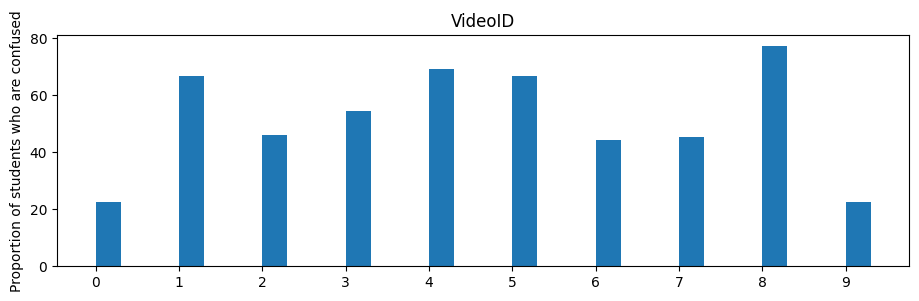

In [ ]:
objects = ('0','1','2','3','4','5','6','7','8','9')
y_pos = np.arange(len(objects))
performance = [22.32, 66.66, 45.83, 54.31, 68.98, 66.67, 44.04, 45.39, 77.37, 22.29]

#plt.bar(y_pos, performance, align='center', alpha=0.5)

plt.figure(figsize=(11, 3))  
plt.bar(y_pos, performance, align='edge', width=0.3)

plt.xticks(y_pos, objects)
plt.ylabel('Proportion of students who are confused')
plt.title('VideoID')

plt.show()

Next step was creating a new column called CourseID. We have then named the videos which were most confusing with CoursID of 400 level courses, while videos which were least confusing were named with CourseID of 100 level courses.

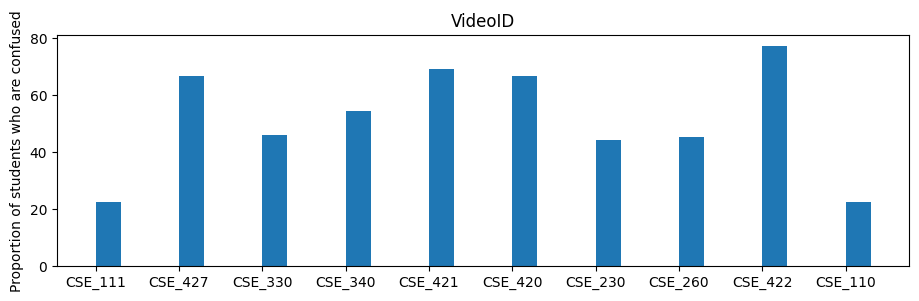

In [ ]:
objects = ('CSE_111','CSE_427','CSE_330','CSE_340','CSE_421','CSE_420','CSE_230','CSE_260','CSE_422','CSE_110')
y_pos = np.arange(len(objects))
performance = [22.32, 66.66, 45.83, 54.31, 68.98, 66.67, 44.04, 45.39, 77.37, 22.29]

#plt.bar(y_pos, performance, align='center', alpha=0.5)

plt.figure(figsize=(11, 3))  
plt.bar(y_pos, performance, align='edge', width=0.3)


plt.xticks(y_pos, objects)
plt.ylabel('Proportion of students who are confused')
plt.title('VideoID')

plt.show()

This is how our intermediate dataset looks like:

In [ ]:

data = input.drop(['SubjectID', 'predefinedlabel'], axis=1)
df = data['VideoID']
df1=df.replace(to_replace =0.0, value ="CSE_111") 
df2=df1.replace(to_replace =1.0, value ="CSE_427") 
df3=df2.replace(to_replace =2.0, value ="CSE_330") 
df4=df3.replace(to_replace =3.0, value ="CSE_340") 
df5=df4.replace(to_replace =4.0, value ="CSE_421") 
df6=df5.replace(to_replace =5.0, value ="CSE_420") 
df7=df6.replace(to_replace =6.0, value ="CSE_230") 
df8=df7.replace(to_replace =7.0, value ="CSE_260") 
df9=df8.replace(to_replace =8.0, value ="CSE_422") 
df10=df9.replace(to_replace =9.0, value ="CSE_110")
df11=df10.to_frame()
df11.columns = ['CourseID']
df_concat = pd.concat([df11, data], axis=1)
df_concat
dataset_new = df_concat.drop(['VideoID'], axis=1)
dataset_new


,CourseID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,CSE_111,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,CSE_111,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,CSE_111,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,CSE_111,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,CSE_111,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,CSE_110,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,0.0
12807,CSE_110,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,0.0
12808,CSE_110,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,0.0
12809,CSE_110,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,0.0


Next step was applying one hot encoding to our intermediate datasetto encode the categorical data represented by CourseID

In [ ]:
input2 = dataset_new
input2['CourseID'].unique()
category_enc = pd.get_dummies(input2['CourseID'])
category_enc
df_concat = pd.concat([category_enc, input2], axis=1)



df_concat = pd.concat([category_enc, input2], axis=1)
OneHotDataset = df_concat.drop(['CourseID'], axis=1)

OneHotDataset

,CSE_110,CSE_111,CSE_230,CSE_260,CSE_330,CSE_340,CSE_420,CSE_421,CSE_422,CSE_427,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,0,1,0,0,0,0,0,0,0,0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,0,1,0,0,0,0,0,0,0,0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,0,1,0,0,0,0,0,0,0,0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,0,1,0,0,0,0,0,0,0,0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,0,1,0,0,0,0,0,0,0,0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,1,0,0,0,0,0,0,0,0,0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,0.0
12807,1,0,0,0,0,0,0,0,0,0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,0.0
12808,1,0,0,0,0,0,0,0,0,0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,0.0
12809,1,0,0,0,0,0,0,0,0,0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,0.0


Downloading the new synthesized dataset (Dataset 2)

In [ ]:
OneHotDataset.to_csv('OneHotDataset.csv')
files.download('OneHotDataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>